In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X = customer_data.iloc[:, [3, 4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    km.fit(X)

    wcss.append(km.inertia_)

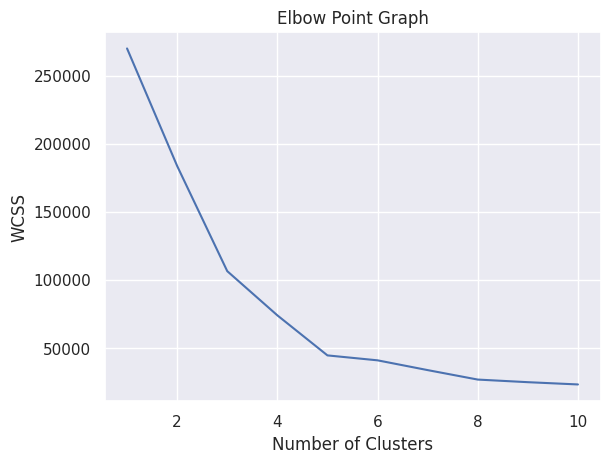

In [ ]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)


Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


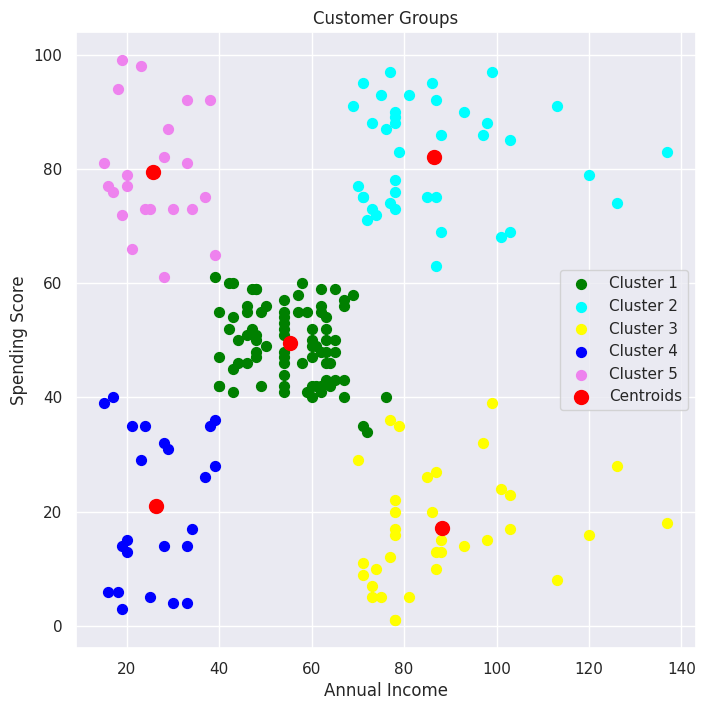

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 50, c = "green", label = "Cluster 1" )
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 50, c = "cyan", label = "Cluster 2" )
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 50, c = "yellow", label = "Cluster 3" )
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 50, c = "blue", label = "Cluster 4" )
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 50, c = "violet", label = "Cluster 5" )

# plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "red", label = "Centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [ ]:
!pip install gradio

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import gradio as gr


# Load dataset

data = pd.read_csv("Mall_Customers.csv")

# Select features (Annual Income & Spending Score)
X = data.iloc[:, [3, 4]].values


# Train KMeans

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans.fit(X)


# Define prediction function

def predict_cluster(annual_income, spending_score):
    # Make prediction
    cluster = kmeans.predict([[annual_income, spending_score]])[0]
    return f"Customer belongs to Cluster: {cluster}"


# Build Gradio Interface

with gr.Blocks() as demo:
    gr.Markdown("## 🛍️ Mall Customers Segmentation")
    gr.Markdown("Enter Annual Income (k$) and Spending Score (1-100) to find the customer’s cluster.")

    with gr.Row():
        annual_income = gr.Number(label="Annual Income (k$)", value=50)
        spending_score = gr.Number(label="Spending Score (1-100)", value=50)

    predict_btn = gr.Button("Find Cluster")
    output = gr.Textbox(label="Result")

    predict_btn.click(
        fn=predict_cluster,
        inputs=[annual_income, spending_score],
        outputs=output
    )


demo.launch()



"""
typically 5 clusters are :
Low Income, Low Spending → Budget shoppers
Low Income, High Spending → Generous spenders despite low income
High Income, Low Spending → Careful / conservative spenders
High Income, High Spending → Premium / VIP customers
Average Income, Average Spending → Middle group, balanced
"""


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0cf1aa1499567b80f6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
